In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea

In [94]:

df=pd.read_csv('/content/drive/MyDrive/NLP/HateSpeechDetection.csv')

In [95]:
df.head()

,Platform,Comment,Hateful
0,Reddit,Damn I thought they had strict gun laws in Ger...,0
1,Reddit,I dont care about what it stands for or anythi...,0
2,Reddit,It's not a group it's an idea lol,0
3,Reddit,So it's not just America!,0
4,Reddit,The dog is a spectacular dancer considering he...,0


In [97]:
df.isnull().sum()

Platform    0
Comment     0
Hateful     0
dtype: int64

In [98]:
df.describe()

,Hateful
count,3000.000000
mean,0.200000
std,0.400067
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [99]:
df['Platform'].unique()

array(['Reddit', 'Twitter', '4Chan'], dtype=object)

In [100]:
# !pip install wordcloud
X, y = df['Comment'], df['Hateful']


In [101]:
classes, class_count = np.unique(y, return_counts = True)

<ipython-input-126-4acb715c224f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(x = 'Hateful' , data = df , palette = 'Paired')


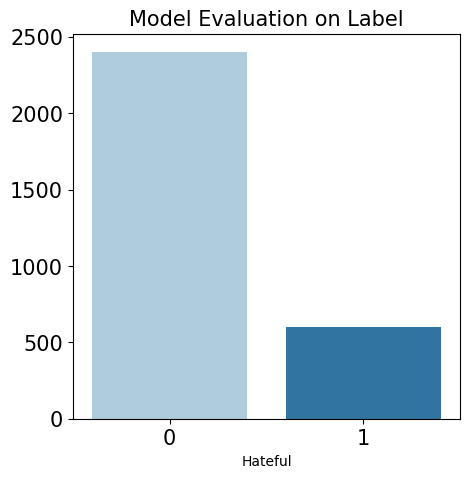

0    2400
1     600
Name: Hateful, dtype: int64

In [126]:
plt.figure(figsize=(5,5))
sea.countplot(x = 'Hateful' , data = df , palette = 'Paired')
plt.ylabel("")
plt.tick_params(axis = 'x',labelsize = 15)
plt.tick_params(axis = 'y',labelsize = 15)
plt.title("Model Evaluation on Label" , fontsize = 15)
plt.show()
df['Hateful'] .value_counts()

In [103]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,3000):
    review=re.sub('[^a-zA-Z]',' ',df['Comment'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    review=[ ps.stem(word) for word in review if not word in set(all_stopwords)]
    review=" ".join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
print(corpus)

['damn thought strict gun law germani', 'dont care stand anyth connect like shield', 'not group idea lol', 'not america', 'dog spectacular dancer consid two left feet', 'ppl dont wear mask complain ppl wear mask u also complain', 'send back africa', 'check see whatabout past yup inde whatabout past', 'european approv', 'idk group join cool', 'sometim messeng import messag', 'futur want', 'wow monkey call someon els monkey lol', 'gypsi america', 'know guy', 'meal team six', 'guy respawn', 'sorri misspel texa', 'combin gold wow amaz though', 'chad wear cowboy hat wed', 'truli believ media lot peopl mental health problem', 'that beauti famili ask anyth cuter', 'good', 'psycholog behind behavior', 'feet sweat', 'group led kid eat booger camera', 'pineappl pizza', 'iron call monkey', 'stun brave', 'good thing polic kept peac sure', 'man fall till day', 'whatev happen organ bowl leagu someth', 'found two question teacher gave part z', 'want acknowledg babe ladi not worri dog hair wed dress',

In [105]:
df['Clean text'] = corpus

In [106]:
from wordcloud import WordCloud

def create_wordcloud(df, column, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black',
                          colormap='turbo', collocations=False).generate(' '.join(df[column]))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {column} in {title}', fontsize=16, color='black')
    plt.axis('off')
    plt.show()

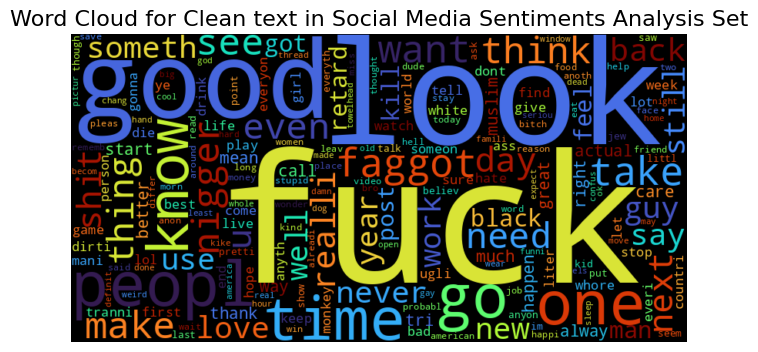

In [107]:
create_wordcloud(df, 'Clean text', 'Social Media Sentiments Analysis Set')

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=df.iloc[:,-2].values

In [109]:
print(X)
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[0 0 0 ... 0 1 1]


In [110]:
len(X[0])

1500

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [112]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [113]:
y_pred = NB_model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 0]
 [0 0]]
[[310 159]
 [ 17 114]]


0.7066666666666667

In [114]:
from sklearn.svm import SVC
SVC_model = SVC(kernel = 'linear', random_state = 0)
SVC_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [115]:
y_pred = SVC_model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[460   9]
 [ 25 106]]


0.9433333333333334

In [117]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [118]:
y_pred = KNN.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [119]:
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[467   2]
 [ 89  42]]


0.8483333333333334

In [120]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model=classifier1.fit(X_train, y_train)

In [121]:
y_pred1 = classifier1.predict(X_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1= confusion_matrix(y_test, y_pred1)
print(cm1)
accuracy_score(y_test, y_pred1)

[[451  18]
 [ 25 106]]


0.9283333333333333

<ipython-input-125-a19debf62348>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
<ipython-input-125-a19debf62348>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
<ipython-input-125-a19debf62348>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
<ipython-input-125-a19debf62348>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
<ipython-input-125-a19debf62348>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and s

                   Models   Accuracy
0    KNeighborsClassifier  79.000000
0              GaussianNB  71.166667
0  DecisionTreeClassifier  89.500000
0                     SVC  90.000000


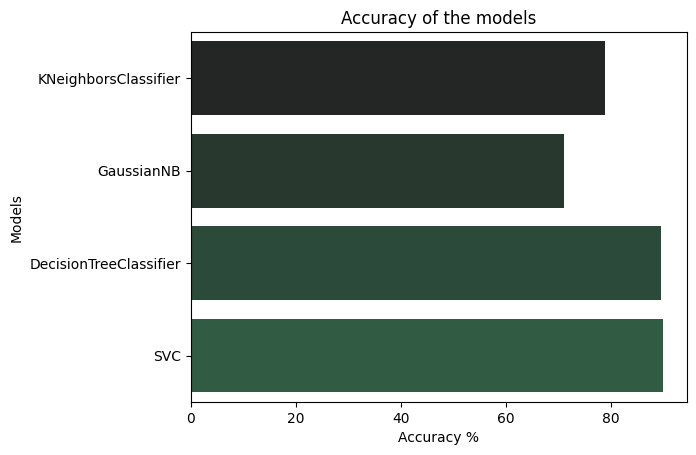

In [125]:
from sklearn.model_selection import cross_val_score,GridSearchCV
models = [KNN,NB_model,DT_model,SVC_model]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = cross_val_score(model,X_test,y_test,cv=10,scoring="accuracy").mean()
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
pal=sea.dark_palette("seagreen")
sea.barplot(x= 'Accuracy', y = 'Models', data=results, palette=pal)
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models')
print(results)